Step 1: **Data Collection**

Load the dataset and visualize the data

In [28]:
import pandas as pd

df = pd.read_csv('air_quality.csv')

Step 2: **Data Processing**

Clean and preprocess the data to handle missing values and outliers.

In [27]:
# Drop rows with NaN values after lagging
df.dropna(inplace=True)

# Create lag features
for pollutant in ['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)']:
    for lag in range(1, 8):
        df[f'{pollutant}_lag{lag}'] = df[pollutant].shift(lag)

Step 3: **Features Selection**

Select relevant features that influence air pollution

In [ ]:
# Define features and target
features = df.drop(columns=['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)',
                            'Time','CO(GT)','C6H6(GT)','T','RH','AH'])
target = df[['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)']]

Step 4: **Model Training** and **Model Evaluation**

Train multiple decision trees on different subsets of the data and evaluate the model's performance using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df = pd.read_csv('air_quality.csv', index_col=0)

# Drop rows with NaN values after lagging
df.dropna(inplace=True)

# Create lag features
for pollutant in ['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)']:
    for lag in range(1, 8):
        df[f'{pollutant}_lag{lag}'] = df[pollutant].shift(lag)

# Define features and target
features = df.drop(columns=['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)',
                            'Time','CO(GT)','C6H6(GT)','T','RH','AH'])
target = df[['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 28.00203392094015
Root Mean Squared Error: 56.24466141249778


Step 5: **Predictions**

Use the trained model to predict future air pollutant levels

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df = pd.read_csv('air_quality.csv', index_col=0)

# Drop rows with NaN values after lagging
df.dropna(inplace=True)

# Create lag features
for pollutant in ['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)']:
    for lag in range(1, 8):
        df[f'{pollutant}_lag{lag}'] = df[pollutant].shift(lag)

# Define features and target
features = df.drop(columns=['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)',
                            'Time','CO(GT)','C6H6(GT)','T','RH','AH'])
target = df[['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Predict future air quality levels
future_features = X_test.iloc[-1:].copy()

# Shift future features to the next day
future_features = future_features.shift(1)

# Predict the next day's air quality levels
future_pred = rf_model.predict(future_features)

future_pred_df = pd.DataFrame(future_pred, columns=['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)'])

print("Predicted Air Quality Levels for the Next Day:")
print(f"{future_pred_df}")


Predicted Air Quality Levels for the Next Day:
   NO2(GT)  PT08.S1(CO)  NMHC(GT)  NOx(GT)
0    91.12       971.32    -200.0   111.34


Final Step: **Visualization**

Visualiaze datas for deep insight with actual results and prediction results

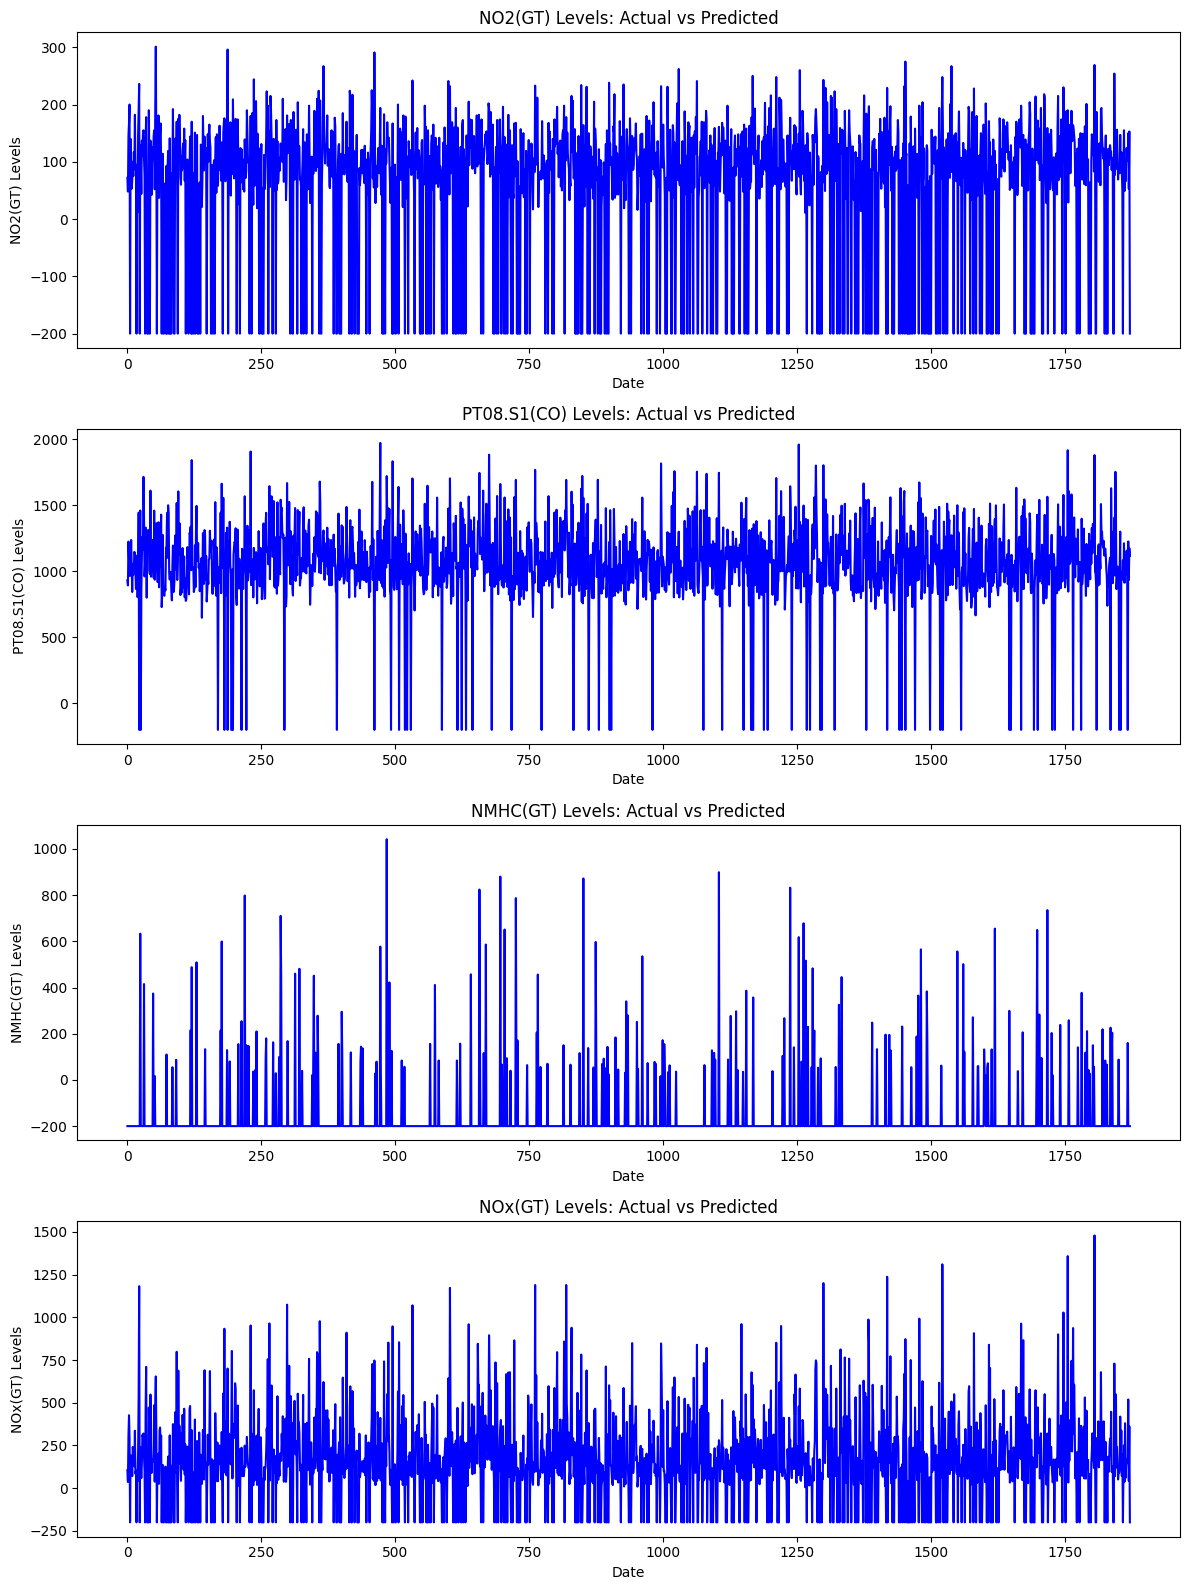

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df = pd.read_csv('air_quality.csv', index_col=0)

# Drop rows with NaN values after lagging
df.dropna(inplace=True)

# Create lag features
for pollutant in ['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)']:
    for lag in range(1, 8):
        df[f'{pollutant}_lag{lag}'] = df[pollutant].shift(lag)

# Define features and target
features = df.drop(columns=['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)',
                            'Time','CO(GT)','C6H6(GT)','T','RH','AH'])
target = df[['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Predict future air quality levels
future_features = X_test.iloc[-1:].copy()

# Shift future features to the next day
future_features = future_features.shift(1)

# Predict the next day's air quality levels
future_pred = rf_model.predict(future_features)


future_pred_df = pd.DataFrame(future_pred, columns=['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)'])

actual_pred_df = y_test.copy()

actual_pred_df.columns = ['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)']

# Concatenate predictions and actual values
results_df = pd.concat([actual_pred_df.add_suffix('_actual').reset_index(drop=True),
                        future_pred_df.add_suffix('_pred').reset_index(drop=True)],
                       axis=1)

# Plot predictions vs actual values for each pollutant
fig, axs = plt.subplots(4, 1, figsize=(12, 16))

pollutants = ['NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)']
for i, pollutant in enumerate(pollutants):
    axs[i].plot(results_df.index, results_df[f'{pollutant}_actual'], label='Actual', color='blue')
    axs[i].plot(results_df.index, results_df[f'{pollutant}_pred'], label='Predicted', color='red')
    axs[i].set_title(f'{pollutant} Levels: Actual vs Predicted')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel(f'{pollutant} Levels')

plt.tight_layout()
plt.show()
